<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/KNN_UAS_Machine_Learning_No_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score

**Import knn datasets**

In [ ]:
url = ("https://raw.githubusercontent.com/joezerr/UASMachineLearning/main/knn_datasets.csv")

**Getting to know the datasets (Data Exploration)**

In [ ]:
no1 = pd.read_csv(url, sep=";", header=None)
no1.head()

,0,1,2,3,4,5,6,7,8
0,3,126,88.0,41,235,"39,3","0,704",27,0
1,8,99,84.0,0,0,"35,4","0,388",50,0
2,7,196,90.0,0,0,"39,8","0,451",41,1
3,9,119,80.0,35,0,29,"0,263",29,1
4,11,143,94.0,33,146,"36,6","0,254",51,1


In [ ]:
no1.columns = ["X1","X2","X3","X4","X5","X6","X7","X8","X9"]
no1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,3,126,88.0,41,235,"39,3","0,704",27,0
1,8,99,84.0,0,0,"35,4","0,388",50,0
2,7,196,90.0,0,0,"39,8","0,451",41,1
3,9,119,80.0,35,0,29,"0,263",29,1
4,11,143,94.0,33,146,"36,6","0,254",51,1


In [ ]:
no1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      480 non-null    int64  
 1   X2      480 non-null    int64  
 2   X3      479 non-null    float64
 3   X4      480 non-null    int64  
 4   X5      480 non-null    int64  
 5   X6      480 non-null    object 
 6   X7      480 non-null    object 
 7   X8      480 non-null    int64  
 8   X9      480 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 33.9+ KB


there is 1 missing value in column X3, we'll get into that later

In [ ]:
no1.describe()

,X1,X2,X3,X4,X5,X8,X9
count,480.000000,480.000000,479.000000,480.000000,480.000000,480.000000,480.000000
mean,3.779167,121.087500,69.033403,20.714583,79.135417,32.916667,0.352083
std,3.335327,32.312033,19.100344,15.632784,114.186313,11.606336,0.478118
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.500000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,122.750000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,744.000000,81.000000,1.000000


**DATA PREPROCESSING**

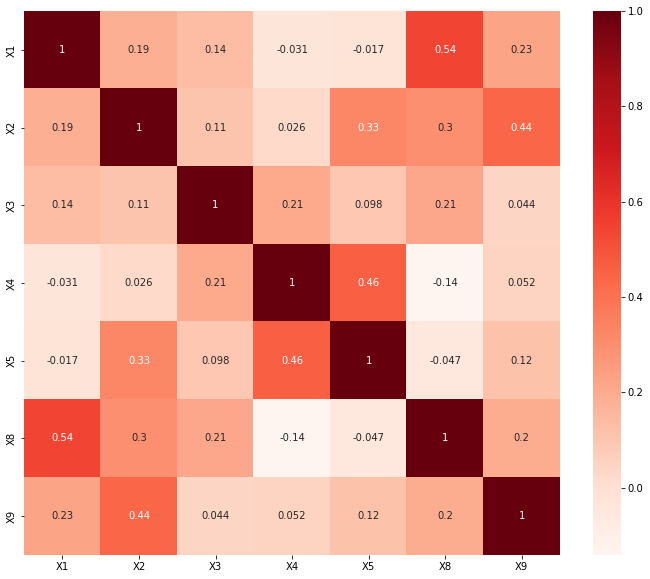

In [ ]:
plt.figure(figsize=(12,10))
cor = no1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#take a look at the outcome variable 'X9'
print(no1['X9'].value_counts())

0    311
1    169
Name: X9, dtype: int64


In [ ]:
#assign X as dataframe of features and y as a series of the outcome variable
X = no1.drop('X9', axis=1)
y = no1.X9

In [ ]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,3,126,88.0,41,235,"39,3","0,704",27
1,8,99,84.0,0,0,"35,4","0,388",50
2,7,196,90.0,0,0,"39,8","0,451",41
3,9,119,80.0,35,0,29,"0,263",29
4,11,143,94.0,33,146,"36,6","0,254",51


one of the main thing that needs to be done is cleaning the data to ensure it is fitted

**Replace commas with dots**

Two columns of the datasets contain commas. This means that the whole column type is string, not float. In order to change the data type into float, we need to replace commas with dots

In [ ]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,3,126,88.0,41,235,"39,3","0,704",27
1,8,99,84.0,0,0,"35,4","0,388",50
2,7,196,90.0,0,0,"39,8","0,451",41
3,9,119,80.0,35,0,29,"0,263",29
4,11,143,94.0,33,146,"36,6","0,254",51


In [ ]:
#replace commas with dots
X["X6"]=X["X6"].str.replace(',','.')

In [ ]:
X["X7"]=X["X7"].str.replace(',','.')

In [ ]:
#check again to ensure
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,3,126,88.0,41,235,39.3,0.704,27
1,8,99,84.0,0,0,35.4,0.388,50
2,7,196,90.0,0,0,39.8,0.451,41
3,9,119,80.0,35,0,29,0.263,29
4,11,143,94.0,33,146,36.6,0.254,51


**Split the data into training and testing data**

data is splitted with between testing (0.25) and training (0.75) ratio

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, shuffle= True, random_state= 0)

X_train= np.array(X_train)
y_train= np.array(y_train)

X_test= np.array(X_test) 
y_test= np.array(y_test)

**DATA SCALER**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Handling missing value**

*as mentioned previously, there exist 1 missing value in column X3 as seen below*

In [ ]:
X.isnull().sum().sort_values(ascending=False).head()

X3    1
X1    0
X2    0
X4    0
X5    0
dtype: int64

In [ ]:
#fill missing value with the most frequent apperared value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X)
X = pd.DataFrame(data=imputer.transform(X), columns = X.columns)

In [ ]:
#check whether the missing value still exist or not
X.isnull().sum().sort_values(ascending=False).head()

X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

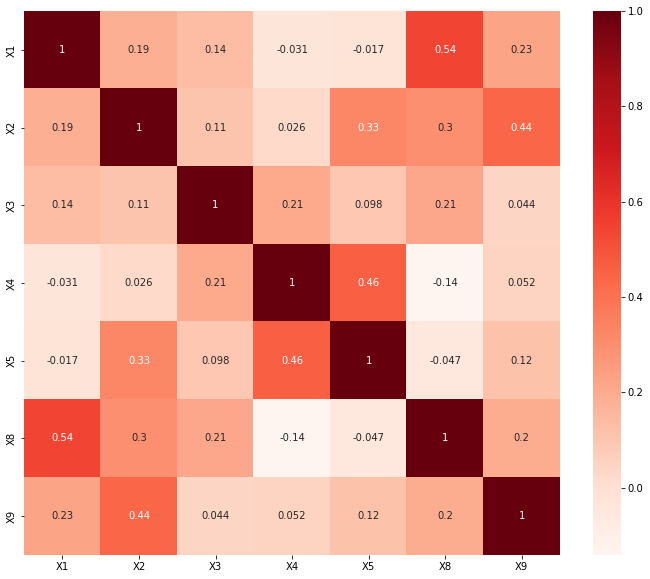

In [ ]:
plt.figure(figsize=(12,10))
cor = no1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Drop Low Correlation Attributes**

In [ ]:
#drop any low correlation attributes respective to X9 (< 0.4)
X = X.drop(['X1','X3','X4','X5','X7','X8'], axis=1)

In [ ]:
X.head()

,X2,X6
0,126.0,39.3
1,99.0,35.4
2,196.0,39.8
3,119.0,29.0
4,143.0,36.6


X2 dan X6 mempunyai korelasi tinggi dengan X9

**KNN**

In [ ]:
def distance_ecu(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

def predict_the_knn(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(distance_ecu(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    labels = y_train[top_k]
    pred.append(mode(labels).mode[0])

  return pred

***Find optimum K***

optimum k digunakan untuk mendapatkan accuracy terbaik

In [ ]:
error = []
for k in range(1, 45):
  y_pred = predict_the_knn(X_train, y_train, X_test, k)
  error.append(np.sqrt(mean_squared_error(y_test, y_pred)))

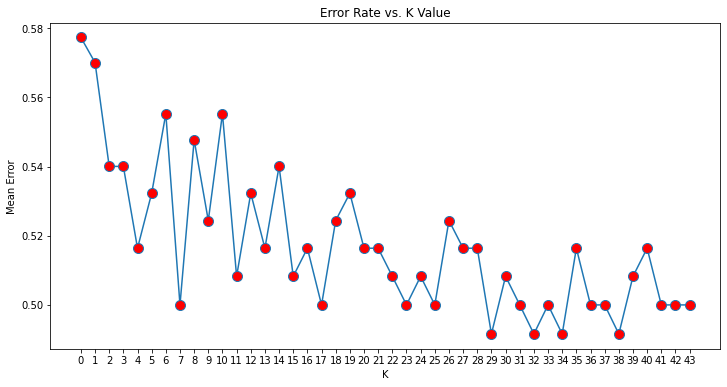

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(error, marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xticks(np.arange(0, len(error), 1.0))
plt.xlabel('K')
plt.ylabel('Mean Error')
plt.show()

Based on the error rate vs K value plotting above, the optimum k value is 38.Use k value = 38 as the optimum k

**Retrain**

Train the model with the optimum k value = 38



In [ ]:
best_k = 38

y_pred = predict_the_knn(X_train, y_train, X_test, best_k)
acc = accuracy_score(y_test, np.array(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Accuracy score: {acc}')
print(f'RMSE: {rmse}')

Accuracy score: 0.75
RMSE: 0.5


In [ ]:
#Model evaluation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84        78
           1       0.88      0.33      0.48        42

    accuracy                           0.75       120
   macro avg       0.80      0.65      0.66       120
weighted avg       0.78      0.75      0.71       120



***Evaluasi***:

Secara keseluruhan, model KNN mempunyai score akurasi yang cukup baik sebesar 0.75, score presisi yang didapatkan juga  bagus yaitu sebesar 0.87, tetapi average  recall score masih relatif rendah sebesar 0.66

**Confusion Matrix**

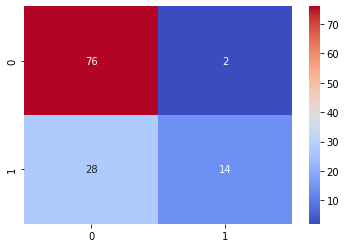

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.show()

Model mampu menghasilkan "True Positives" yang sering, jarang sekali menghasilkan "False Positives", dan juga terkadang menghasilkan "False Negatives. Hasil "False Negatives" lebih baik daripada "False Positives".